In [106]:
import matplotlib.pyplot as plt
import numpy as np
import requests
import pandas as pd
from pprint import pprint
from datetime import datetime
import os
import csv
from pathlib import Path

In [43]:
fire_data_23 = Path("outputs/fires_2023.csv")

In [44]:
fires_df = pd.read_csv(fire_data_23, encoding="ISO-8859-1")

In [45]:
fires_df.head()

,Year,Alarm Date,Containment Date,Cause #,GIS Calculated Acres,Cause
0,2023,8/17/2023,10/25/2023,1,12152.45000,Lightning
1,2023,8/17/2023,9/28/2023,1,95.91678,Lightning
2,2023,8/19/2023,9/2/2023,1,20.01698,Lightning
3,2023,8/15/2023,9/15/2023,1,1684.73000,Lightning
4,2023,8/15/2023,10/25/2023,1,34188.45000,Lightning


In [46]:
fires_df['Fire Duration'] = ''
fires_df.head()

,Year,Alarm Date,Containment Date,Cause #,GIS Calculated Acres,Cause,Fire Duration
0,2023,8/17/2023,10/25/2023,1,12152.45000,Lightning,
1,2023,8/17/2023,9/28/2023,1,95.91678,Lightning,
2,2023,8/19/2023,9/2/2023,1,20.01698,Lightning,
3,2023,8/15/2023,9/15/2023,1,1684.73000,Lightning,
4,2023,8/15/2023,10/25/2023,1,34188.45000,Lightning,


In [47]:
fires_df['Alarm Date'] = pd.to_datetime(fires_df['Alarm Date'])
fires_df['Containment Date'] = pd.to_datetime(fires_df['Containment Date'])
fires_df.head()

,Year,Alarm Date,Containment Date,Cause #,GIS Calculated Acres,Cause,Fire Duration
0,2023,2023-08-17,2023-10-25,1,12152.45000,Lightning,
1,2023,2023-08-17,2023-09-28,1,95.91678,Lightning,
2,2023,2023-08-19,2023-09-02,1,20.01698,Lightning,
3,2023,2023-08-15,2023-09-15,1,1684.73000,Lightning,
4,2023,2023-08-15,2023-10-25,1,34188.45000,Lightning,


In [63]:
fires_df['Fire Duration'] = fires_df['Containment Date'] - fires_df['Alarm Date']    
fires_df.head()

,Year,Alarm Date,Containment Date,Cause #,GIS Calculated Acres,Cause,Fire Duration
0,2023,2023-08-17,2023-10-25,1,12152.45000,Lightning,69 days
1,2023,2023-08-17,2023-09-28,1,95.91678,Lightning,42 days
2,2023,2023-08-19,2023-09-02,1,20.01698,Lightning,14 days
3,2023,2023-08-15,2023-09-15,1,1684.73000,Lightning,31 days
4,2023,2023-08-15,2023-10-25,1,34188.45000,Lightning,71 days


In [89]:
average_duration = []
average_acres = []
cause_df = fires_df.sort_values(by='Cause #').reset_index()
def average_calc(i, df):
    test_df = df.loc[df['Cause #'] == i]
    days = []
    for d in test_df['Fire Duration']:
        days.append(d.days)
    if len(days) != 0:
        average_d = round(sum(days)/len(days), 2)
    else:
        average_d = 0
    average_a = round(test_df['GIS Calculated Acres'].mean(),2)
    return average_d, average_a

for i in cause_df['Cause #'].unique():
    d, a = average_calc(i, cause_df)
    average_duration.append(d)
    average_acres.append(a)
cause_list = cause_df['Cause'].unique()

In [103]:
counts = cause_df.groupby('Cause #').size()
counts

Cause #
1      33
2      24
3       2
4       6
5       7
6       1
7       9
9      12
10     23
11     10
14    154
15      2
dtype: int64

In [104]:
source_df = pd.DataFrame({'Causes' : cause_list, 
                          'Average Duration (days)' : average_duration, 
                          'Average GIS Acres' : average_acres,
                          'Number of Occurences (in the Year)' : counts})
source_df

,Causes,Average Duration (days),Average GIS Acres,Number of Occurences (in the Year)
Cause #,,,,
1,Lightning,27.64,2715.01,33
2,Equipment Use,0.79,42.62,24
3,Smoking,0.00,1.67,2
4,Campfire,1.83,45.73,6
5,Debris,0.00,15.48,7
6,Railroad,4.00,161.81,1
7,Arson,1.67,117.65,9
9,Miscellaneous,1.75,269.48,12
10,Vehicle,1.39,463.37,23


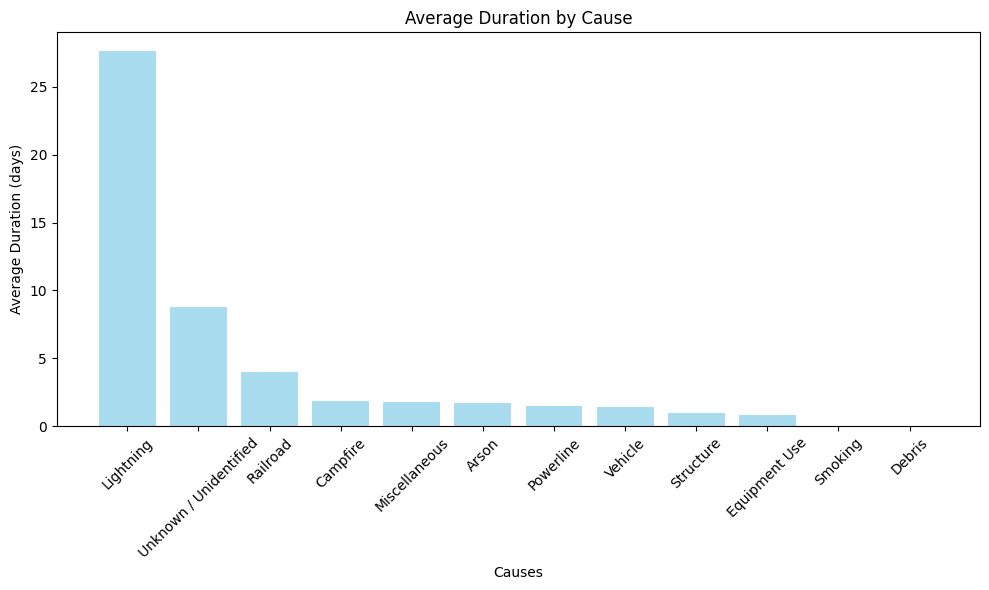

In [114]:
source_df = source_df.sort_values(by='Average Duration (days)', ascending=False)
plt.figure(figsize=(10, 6))

plt.bar(source_df['Causes'], source_df['Average Duration (days)'],
        color='skyblue', alpha=0.7)

plt.xlabel('Causes')
plt.ylabel('Average Duration (days)')
plt.title('Average Duration by Cause')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

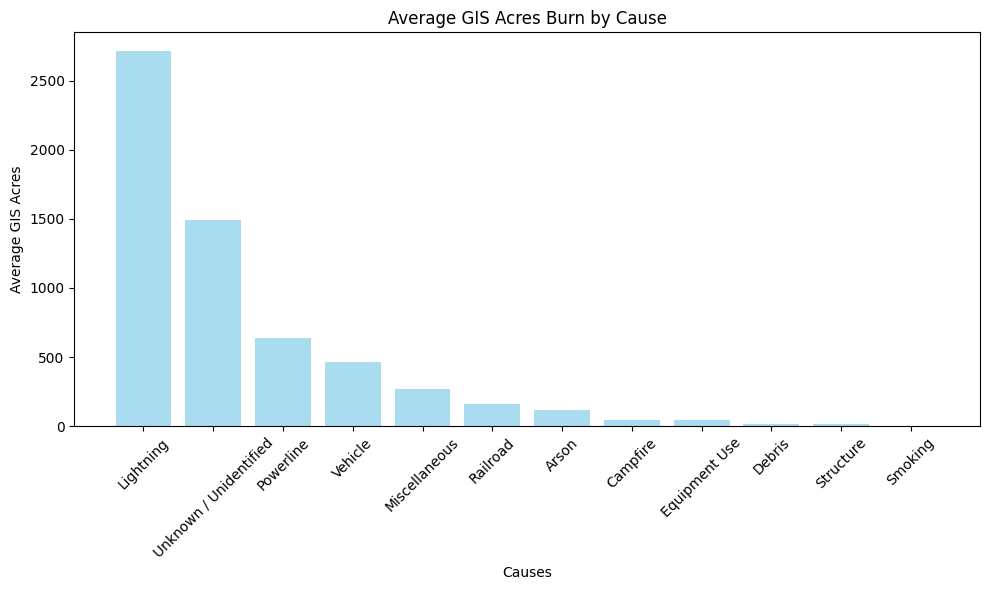

In [116]:
source_df = source_df.sort_values(by='Average GIS Acres', ascending=False)
plt.figure(figsize=(10, 6))

plt.bar(source_df['Causes'], source_df['Average GIS Acres'],
        color='skyblue', alpha=0.7)

plt.xlabel('Causes')
plt.ylabel('Average GIS Acres')
plt.title('Average GIS Acres Burn by Cause')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()